<a href="https://colab.research.google.com/github/beatrizmfranco/beatrizmfranco/blob/main/heart_desease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.3-py2.py3-none-any.whl size=265365897 sha256=fffe1e06e0d1a0e7477209d76bcbcceb37d4fb09b93b8b343daf1a48ab34c698
  Stored in directory: /root/.cache/pip/wheels/c4/63/41/baa115b5255e1db3e2383bce4e2e6181746aac0b42264c242f
Successfully built h2o


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import h2o
from h2o.automl import H2OAutoML


In [4]:
df_original = pd.read_csv('heart.csv')

## Estrutura dos dados

In [5]:
df_original.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df = df_original.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
df = df.rename(columns = {
    'age' : 'idade',
    'sex' : 'sexo',
    'cp' : 'tipo_dor',
    'trestbps' : 'pressao_arterial',
    'chol' : 'colesterol',
    'fbs' : 'glicemia_frutada',
    'restecg' : 'resultado_ecg',
    'thalach' : 'frequencia_maxima',
    'exang' : 'exercise_angina',
    'oldpeak' : 'oldpeak',
    'slope' : 'inclinacao',
    'ca' : 'n_vasos_principais',
    'thal' : 'thal',
    'target' : 'target'
})

## separando treino e teste


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=42)

## Visualizando os dados


array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'sexo'}>,
        <Axes: title={'center': 'tipo_dor'}>,
        <Axes: title={'center': 'pressao_arterial'}>],
       [<Axes: title={'center': 'colesterol'}>,
        <Axes: title={'center': 'glicemia_frutada'}>,
        <Axes: title={'center': 'resultado_ecg'}>,
        <Axes: title={'center': 'frequencia_maxima'}>],
       [<Axes: title={'center': 'exercise_angina'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'inclinacao'}>,
        <Axes: title={'center': 'n_vasos_principais'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

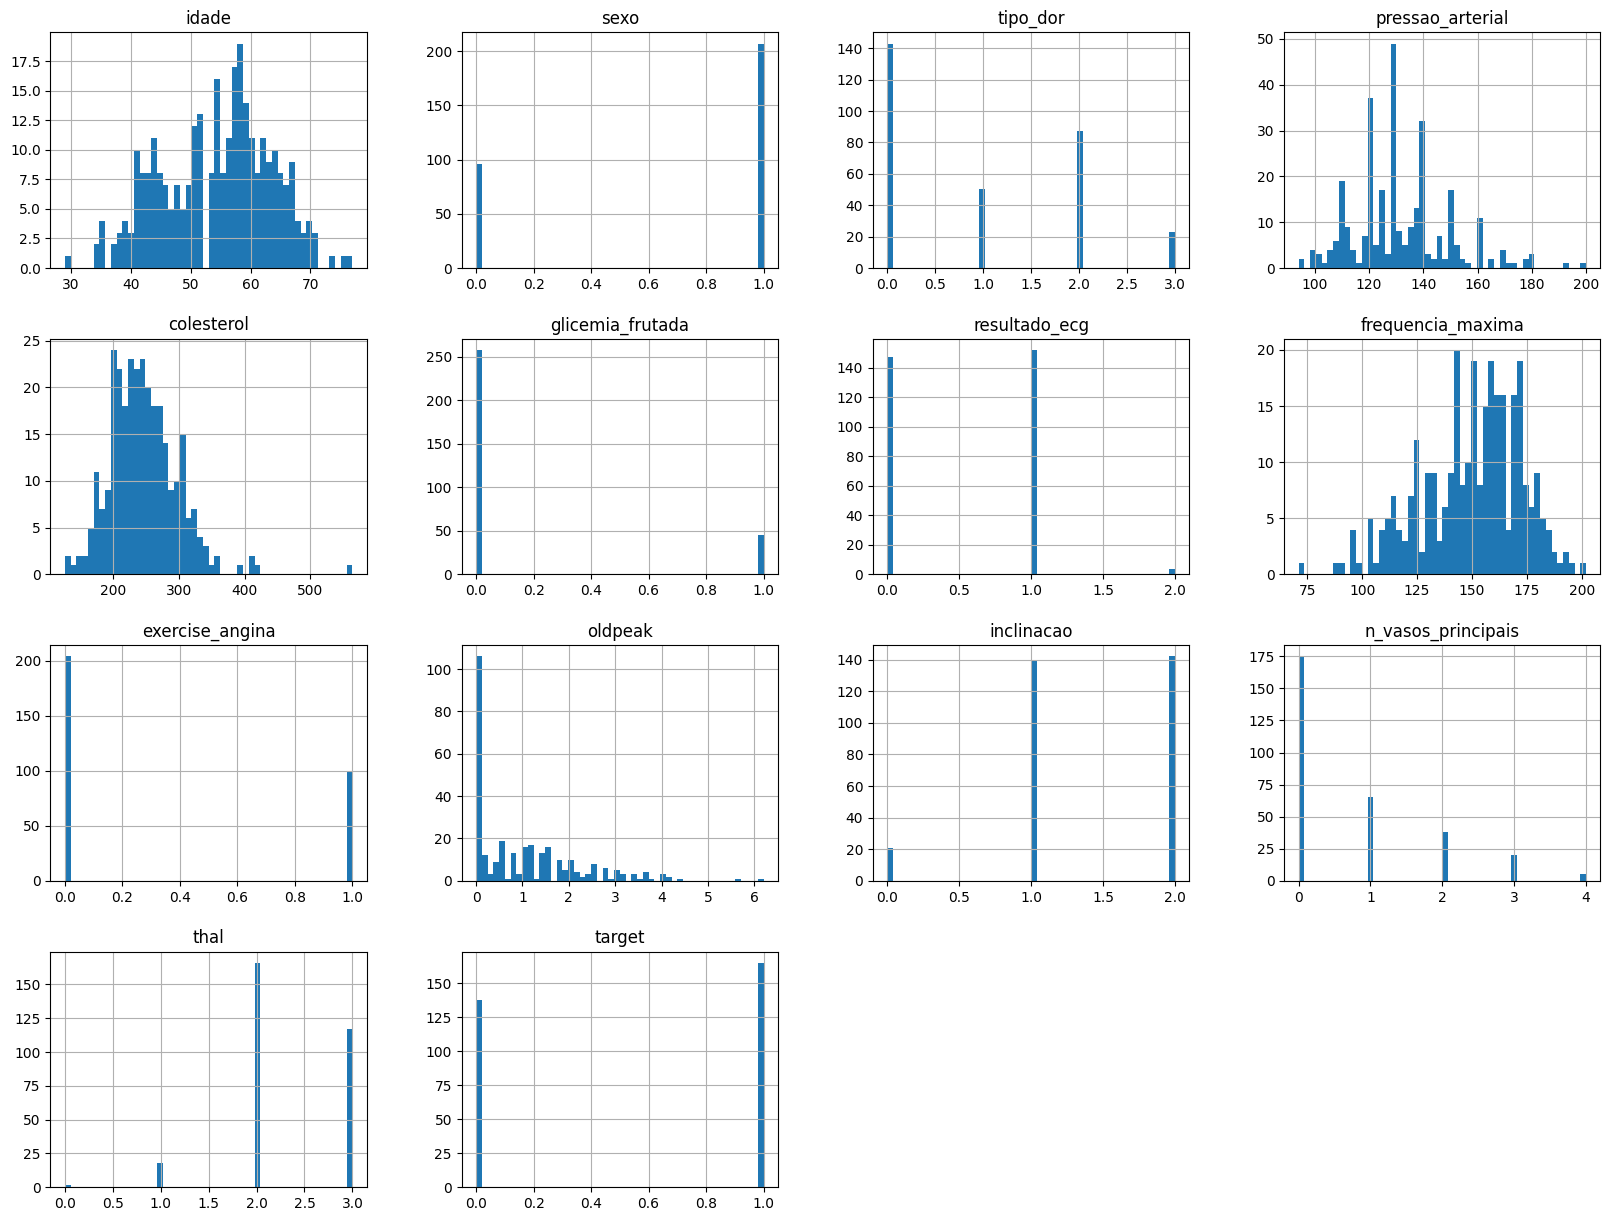

In [12]:
df.hist(bins = 50, figsize = (20,15))

In [13]:
corr_matrix = df.corr()
corr_matrix

,idade,sexo,tipo_dor,pressao_arterial,colesterol,glicemia_frutada,resultado_ecg,frequencia_maxima,exercise_angina,oldpeak,inclinacao,n_vasos_principais,thal,target
idade,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sexo,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
tipo_dor,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
pressao_arterial,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
colesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
glicemia_frutada,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
resultado_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
frequencia_maxima,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


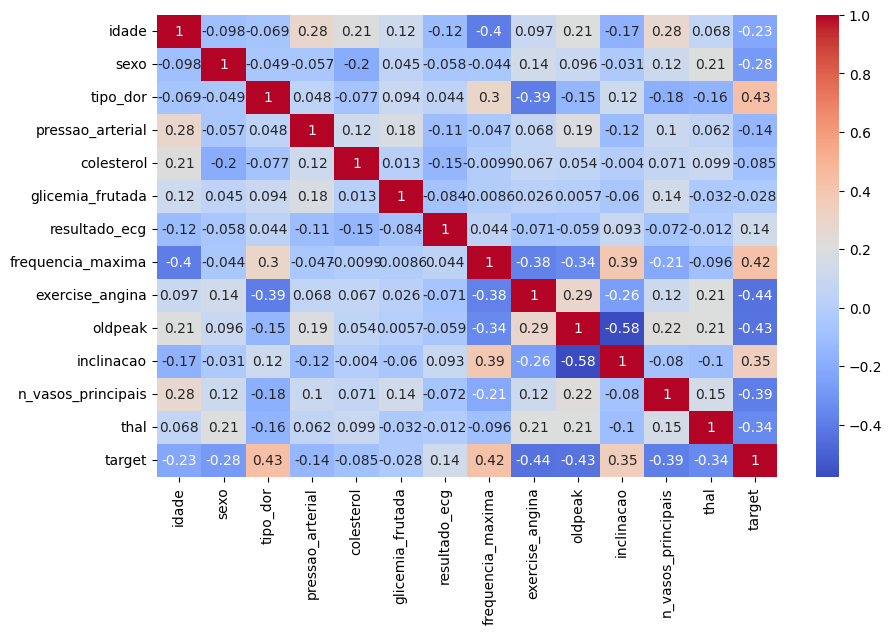

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [15]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpfkltwbhm
  JVM stdout: /tmp/tmpfkltwbhm/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpfkltwbhm/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_8ui4nq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [16]:
df = h2o.import_file('heart.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [17]:
train, test = df.split_frame(ratios=[0.8], seed=42)

In [18]:
y= 'target'
x = df.columns
x.remove(y)

In [19]:
aml = H2OAutoML(max_runtime_secs=300, seed=42)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
23:46:32.80: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
23:46:37.986: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


23:46:39.737: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
23:46:39.895: GBM_1_AutoML_1_20240630_234631 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20240630_234631.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=10

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20240630_234631_model_28


Model Summary: 
    number_of_trees
--  -----------------
    46

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.08324821093218843
RMSE: 0.28852766060152435
MAE: 0.2180747088321187
RMSLE: 0.20749853515291278
Mean Residual Deviance: 0.08324821093218843

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.12575394618495647
RMSE: 0.3546180285672973
MAE: 0.27529018639666086
RMSLE: 0.24826798494760405
Mean Residual Deviance: 0.12575394618495647

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0          nan           nan           nan           nan           nan
loglikelihood           nan       0          nan           nan           nan           nan           nan
mae                     0.275378  0.0337022  0.254298      0.278945      0.246005      0.266227      0.331412
mean_residual_deviance  0.125811  0.0258854  0.112083      0.123647      0.105217      0.11762       0.170486
mse                     0.125811  0.0258854  0.112083      0.123647      0.105217      0.11762       0.170486
r2                      0.489248  0.105508   0.54695       0.497559      0.57245       0.522051      0.30723
residual_deviance       0.125811  0.0258854  0.112083      0.123647      0.105217      0.11762       0.170486
rmse                    0.353331  0.0347901  0.334788      0.351635      0.324372      0.342958      0.4129
rmsle                   0.247188  0.0263039  0.23921       0.239778      0.238021      0.225823      0.293107

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------
    2024-06-30 23:48:09  1 min  2.121 sec  0                  0.5              0.5             0.25
    2024-06-30 23:48:09  1 min  2.228 sec  5                  0.415695         0.404249        0.172803
    2024-06-30 23:48:09  1 min  2.248 sec  10                 0.367797         0.336508        0.135275
    2024-06-30 23:48:09  1 min  2.271 sec  15                 0.34438          0.297814        0.118598
    2024-06-30 23:48:09  1 min  2.294 sec  20                 0.326638         0.268802        0.106693
    2024-06-30 23:48:09  1 min  2.317 sec  25                 0.315085         0.248445        0.0992788
    2024-06-30 23:48:09  1 min  2.341 sec  30                 0.307702         0.238083        0.0946806
    2024-06-30 23:48:09  1 min  2.367 sec  35                 0.301474         0.23023         0.0908866
    2024-06-30 23:48:09  1 min  2.393 sec  40                 0.294241         0.222693        0.0865775
    2024-06-30 23:48:09  1 min  2.420 sec  45                 0.289396         0.218732        0.0837503
    2024-06-30 23:48:09  1 min  2.429 sec  46                 0.288528         0.218075        0.0832482

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
cp          20.9002                1                    0.336325
thal        13.3075                0.63672              0.214145
oldpeak     6.36233                0.304415             0.102382
ca          5.70277                0.272858             0.0917689
thalach     2.93488                0.140424             0.047228
sex         2.65512                0.127038             0.0427262
﻿age         2.63334                0.125996             0.0423756
chol        2.60459                0.124621             0.0419131
slope       2.02781                0.0970235            0.0326314
e

In [20]:
lb = aml.leaderboard
print(lb)

model_id                                                              rmse       mse       mae     rmsle    mean_residual_deviance
XGBoost_grid_1_AutoML_1_20240630_234631_model_28                  0.354618  0.125754  0.27529   0.248268                  0.125754
GBM_lr_annealing_selection_AutoML_1_20240630_234631_select_model  0.354706  0.125817  0.285746  0.249931                  0.125817
GBM_grid_1_AutoML_1_20240630_234631_model_13                      0.355527  0.126399  0.277775  0.247791                  0.126399
XGBoost_grid_1_AutoML_1_20240630_234631_model_46                  0.357518  0.127819  0.274244  0.251474                  0.127819
GBM_grid_1_AutoML_1_20240630_234631_model_18                      0.357956  0.128132  0.279     0.251597                  0.128132
XGBoost_grid_1_AutoML_1_20240630_234631_model_6                   0.358418  0.128463  0.280796  0.251212                  0.128463
GBM_grid_1_AutoML_1_20240630_234631_model_2                       0.358615  0.12860

In [21]:
best_model = aml.leader

In [22]:
perf = best_model.model_performance(test)
print(perf)

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.10496612452275962
RMSE: 0.3239847597075511
MAE: 0.24184814434979232
RMSLE: 0.2355139010143527
Mean Residual Deviance: 0.10496612452275962


In [23]:
predictions = best_model.predict(test)
print(predictions)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
  predict
 0.750719
 0.859982
 0.863259
 0.47665
 0.526619
 1.05099
 1.00263
 1.08002
 0.619034
 1.01592
[62 rows x 1 column]



In [24]:
test_df = test.as_data_frame()

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [25]:
test_df['predictions'] = predictions.as_data_frame()

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [26]:
test_df

,﻿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,predictions
0,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1,0.750719
1,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1,0.859982
2,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1,0.863259
3,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1,0.476650
4,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1,0.526619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0,0.579065
58,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0,0.035943
59,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0,0.065364
60,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0,0.028097


In [31]:
pred = best_model.predict(df)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [33]:
df_pd = df.as_data_frame()

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [34]:
df_pd['predictions'] = pred.as_data_frame()

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [40]:
df_pd = df_pd.reset_index()

In [42]:
df_pd.columns

Index(['index', '﻿age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target',
       'predictions'],
      dtype='object')

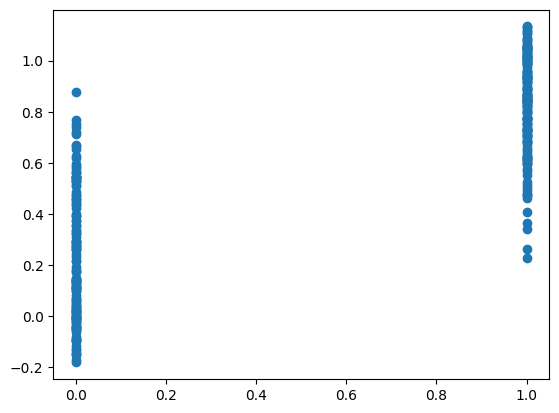

In [46]:

plt.scatter(df_pd['target'],df_pd['predictions'])


In [59]:
df_pd['pred_bin'] = df_pd['predictions'].where(df_pd['predictions'] >=0.6, 0).where(df_pd['predictions'] < 0.6, 1)

In [60]:
df_pd

,index,﻿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,predictions,pred_bin
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.726092,1.0
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.856614,1.0
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1.045697,1.0
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1.051265,1.0
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.753383,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0.400662,0.0
299,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0.391433,0.0
300,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0.020752,0.0
301,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0.028063,0.0


In [64]:
df_pd.where(df_pd['target'] == df_pd['pred_bin'], 0).where(df_pd['target'] != df_pd['pred_bin'], 1).sum()/len(df_pd)

index          0.90099
﻿age           0.90099
sex            0.90099
cp             0.90099
trestbps       0.90099
chol           0.90099
fbs            0.90099
restecg        0.90099
thalach        0.90099
exang          0.90099
oldpeak        0.90099
slope          0.90099
ca             0.90099
thal           0.90099
target         0.90099
predictions    0.90099
pred_bin       0.90099
dtype: float64

In [65]:
df_pd

,index,﻿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,predictions,pred_bin
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.726092,1.0
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.856614,1.0
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1.045697,1.0
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1.051265,1.0
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.753383,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0.400662,0.0
299,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0.391433,0.0
300,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0.020752,0.0
301,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0.028063,0.0


In [66]:
from google.colab import files

In [67]:
df_pd.to_csv('model_heart_attack.csv', index=False)
files.download('model_heart_attack.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>